# Task 2, problem 5 
## Made by Igor Sokolov from 476 group

Solve advection equation 

$$\frac{\partial u}{\partial t} + \frac{\partial u}{\partial x} = 0,\qquad 0\leqslant x\leq 1,\qquad 0\leqslant t\leq 0.5$$


$$
u\big|_{t=0} = \begin{cases}
0, x>0.2 \\ 
1, x\leqslant 0.2\\ 
\end{cases}
$$

using next difference scheme:

$$
u_{0}^{n+1}=u_{1}^{n+1}=1\\
u_{m}^{n+1} = (1 - \sigma)u_{m}^{n} + \sigma u_{m-1}^{n} + \frac{\sigma(\sigma-1)}{2}(f(u_{m-1}^{n}, u_{m}^{n}, u_{m+1}^{n})-f(u_{m-2}^{n}, u_{m-1}^{n}, u_{m}^{n}))
$$

Let $M = 100,\;h = \frac{1}{M},\;\tau=\frac{h}{2},\; \sigma=\frac{\tau}{h}=\frac{1}{2}$


$$f(x,y,z)=z-y$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

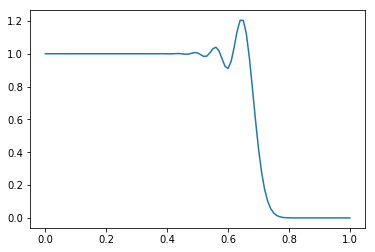

In [61]:
def f(x, y, z):
    return z - y

def step(x):  # Начальное условие - ступенька
    return np.double(x <= 0.2)

def g(t):  # Левое граничное условие
    return 1.0

def solve_advection(u0, g, method, M=100, tmax=0.5, verbose=False):
    X = np.linspace(0, 1, M + 1)
    h = X[1] - X[0]
    tau = h / 2
    courant = tau / h

    if verbose: print('Метод:', method.name, ', число Куранта cт/h =', courant)
    # tau = courant * h   # Скорость с = 1
    u = u0(X)  # Заполняем начальное условие

    t = 0
    steps = 0

    while t < tmax:
        if t + tau > tmax: tau = tmax - t + 1e-14
        unext = np.empty_like(u)
        unext[0] = g(t + tau)  # Используем в левом узле гран условия
        unext[1] = unext[0]
        # В остальных точках считаем по заданной схеме
        unext[2:] = method(u, tau, h)
        u = unext  # Переходим на новый слой по времени
        t += tau;
        steps += 1
    if verbose: print('t =', t, ', сделано', steps, 'шагов')
    return X, u

def vendroff_lax_scheme(u, tau, h):
    sigma = tau / h
    u_new = np.zeros(len(u) - 3)

    for i in range(2, len(u) - 2):
        u_new[i - 2] = (1 - sigma) * u[i] + sigma * u[i - 1] + sigma / 2 * (sigma - 1) * (f(u[i - 1], u[i], u[i + 1]) - f(u[i - 2], u[i - 1], u[i]))

    return np.append(u_new, [sigma * u[-2] + (1 - sigma) * u[-1]])  # Уголок в самой правой точке

vendroff_lax_scheme.name = 'Схема Лакса-Вендроффа'

X, u = solve_advection(step, g, vendroff_lax_scheme)
plt.plot(X, u)
plt.show()
